### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
df.shape

(569, 33)

In [8]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
cols = df.columns
print(cols)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [11]:
del_cols = ['id','diagnosis','Unnamed: 32']

In [12]:
X = df.drop(del_cols, axis = 1)
y = df['diagnosis']

### Plot Diagnosis Distributions
***

Number of Benign Tumors: 357
Number of Malignant Tumors: 212


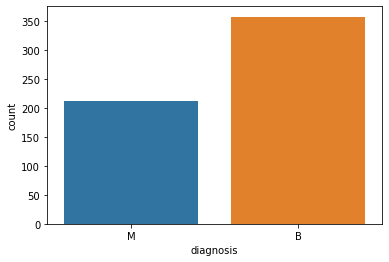

In [7]:
ax = sns.countplot(y, label = 'Count')
B, M = y.value_counts()
print('Number of Benign Tumors:', B)
print('Number of Malignant Tumors:', M)

<h2> Data Visualization </h2>

---

In [13]:
data = X
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features',
                value_name = 'value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

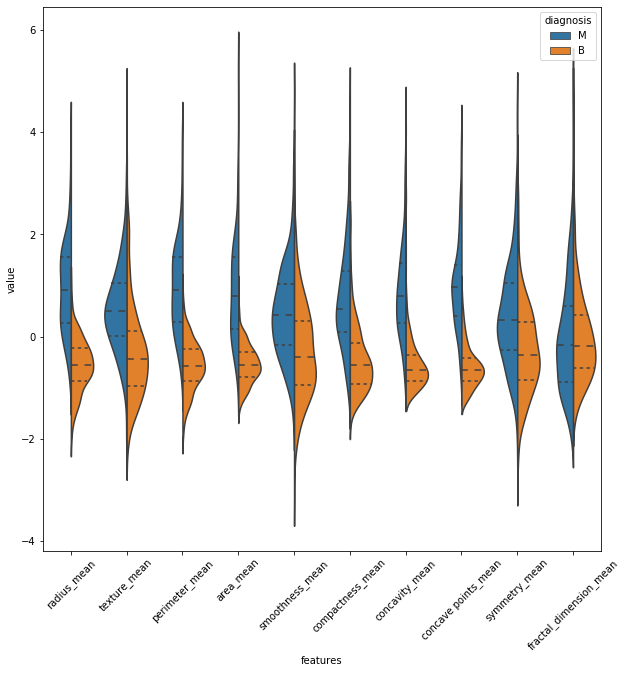

In [14]:
plt.figure(figsize = (10,10))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split = True, inner = 'quart')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

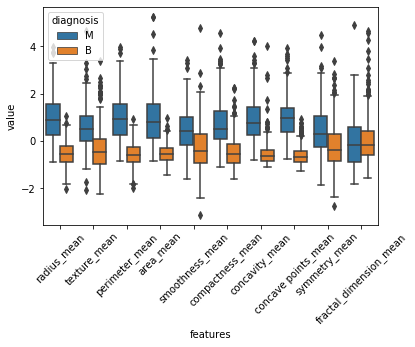

In [15]:
sns.boxplot(x = 'features' , y='value', hue='diagnosis', data = data)
plt.xticks(rotation = 45)

### Violin Plots and Box Plots
***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

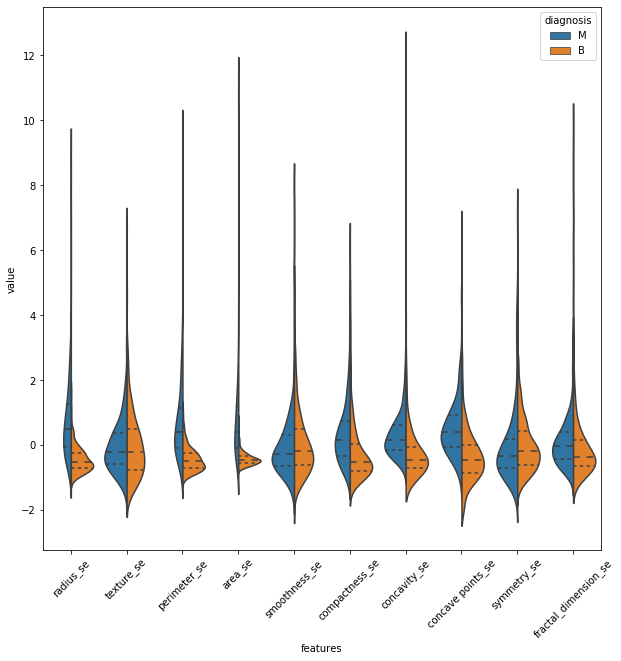

In [16]:
data = pd.concat([y, data_std.iloc[:,10:20]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features',
                value_name = 'value')
plt.figure(figsize = (10,10))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split = True, inner = 'quart')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

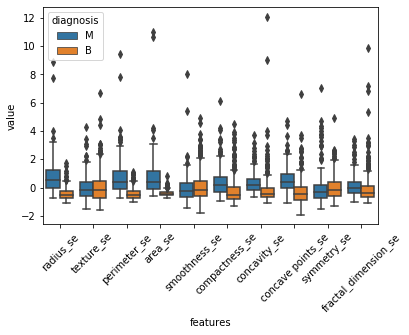

In [29]:
sns.boxplot(x = 'features' , y='value', hue='diagnosis', data = data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

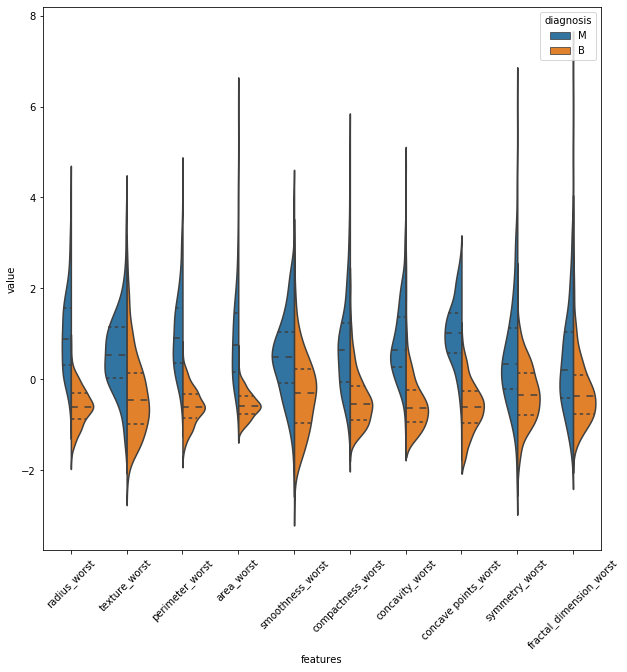

In [17]:
data = pd.concat([y, data_std.iloc[:,20:30]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features',
                value_name = 'value')
plt.figure(figsize = (10,10))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split = True, inner = 'quart')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

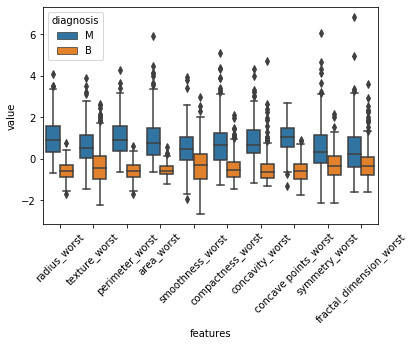

In [18]:
sns.boxplot(x = 'features' , y='value', hue='diagnosis', data = data)
plt.xticks(rotation = 45)

### Observing the Distribution of Values and their Variance with Swarm Plots
***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

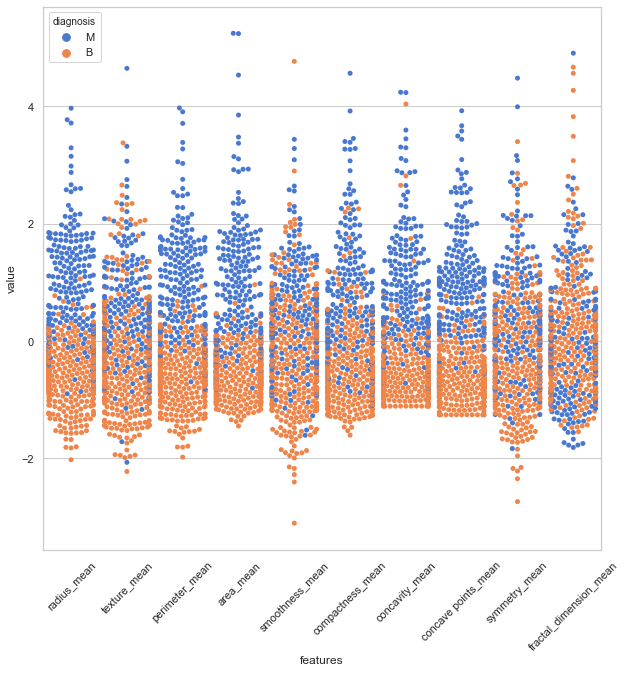

In [19]:
sns.set(style='whitegrid', palette = 'muted')
data = pd.concat([y, data_std.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features',
                value_name = 'value')
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

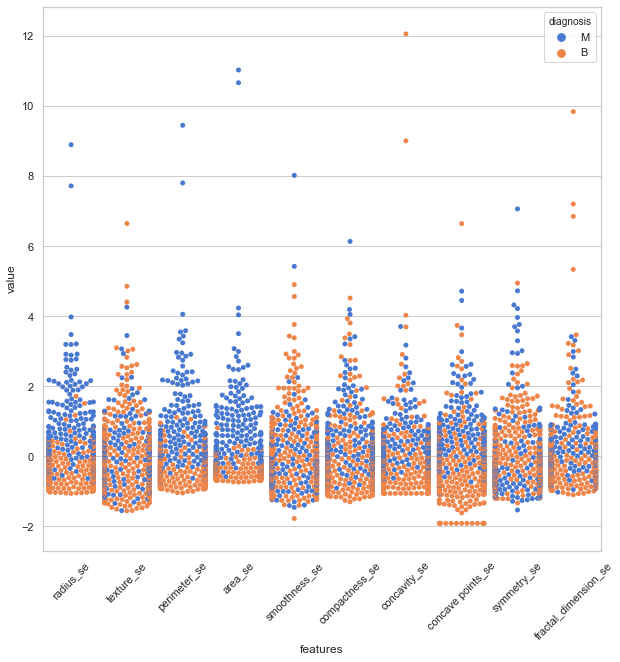

In [20]:
data = pd.concat([y, data_std.iloc[:,10:20]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features',
                value_name = 'value')
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

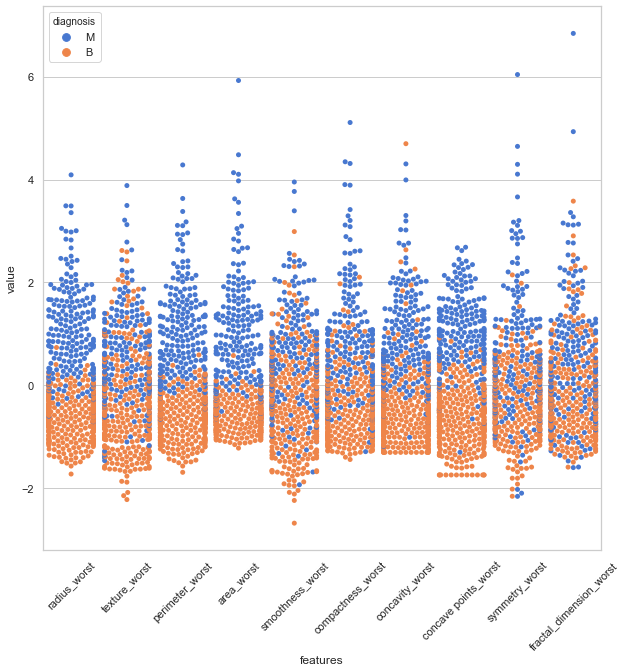

In [21]:
data = pd.concat([y, data_std.iloc[:,20:30]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features',
                value_name = 'value')
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = data)
plt.xticks(rotation = 45)

### Obtaining all Pair-wise Correlations
***

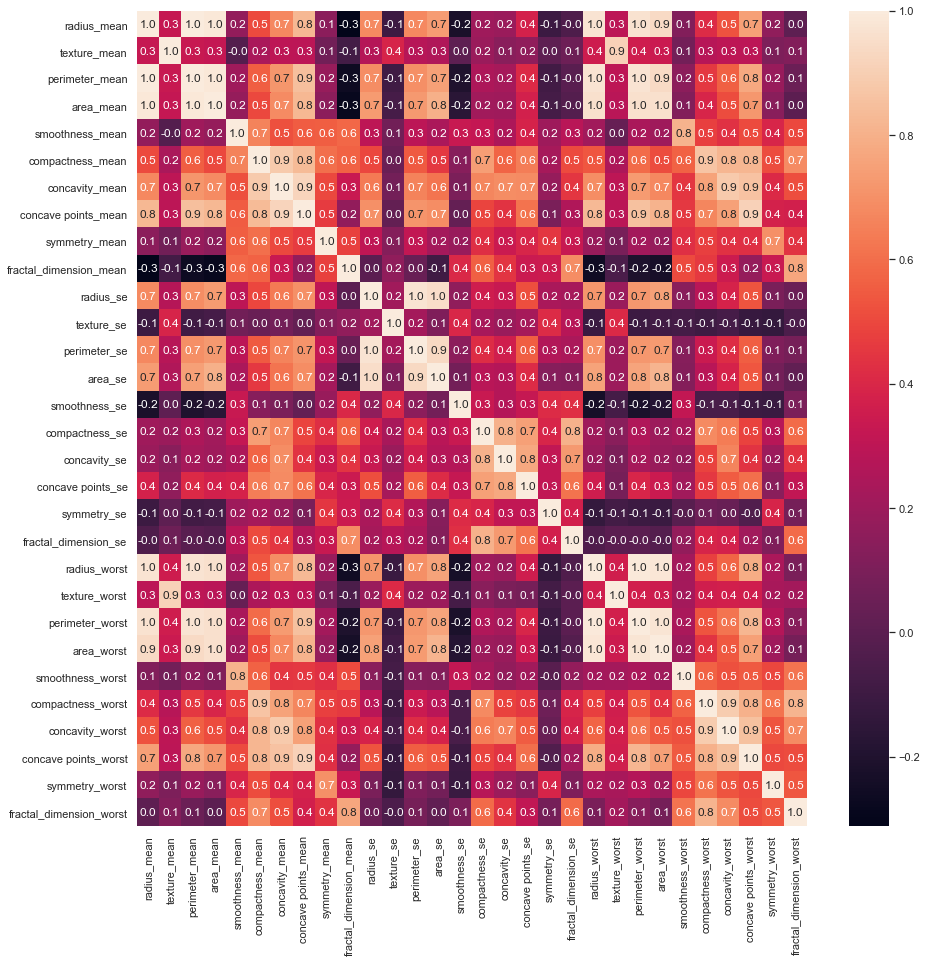

In [22]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(X.corr(), annot = True, fmt = '.1f', ax = ax );

In [24]:
cols = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se','texture_worst', 'area_worst']

In [25]:
df = X.drop(cols, axis=1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


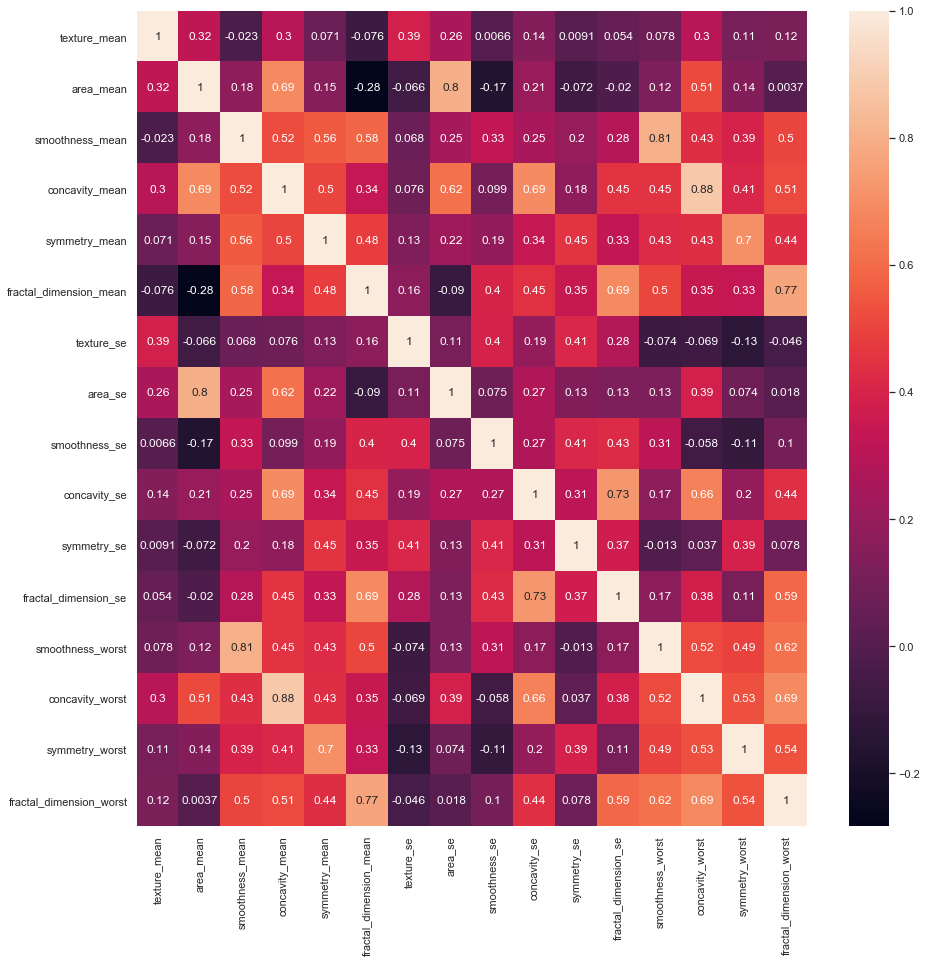

In [26]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, ax=ax)

<h3>XGBoost Classifier</h3>

In [29]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.30, random_state = 42)
print("Shape of training set: ", X_train.shape, y_train.shape)
print("Shape of test set: ", X_test.shape, y_test.shape)

Shape of training set:  (398, 16) (398,)
Shape of test set:  (171, 16) (171,)


In [35]:
clf_1 = xgb.XGBClassifier(random_state = 42)
clf_1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
y_1 = clf_1.predict(X_test)

In [37]:
print('Accuracy: ',accuracy_score(y_1, y_test))

Accuracy:  0.9766081871345029


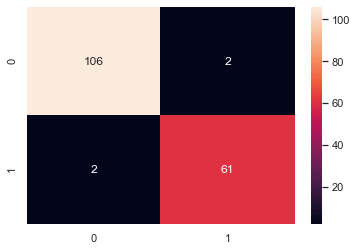

In [38]:
cm = confusion_matrix(y_1, y_test)
sns.heatmap(cm, annot= True, fmt = 'd')

<h3>Univariate Feature Selection</h3>

In [27]:
from sklearn.feature_selection import chi2, SelectKBest

In [31]:
ft = SelectKBest(chi2, k= 10).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Columns:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [67]:
X_train_2 = ft.transform(X_train)
X_test_2 = ft.transform(X_test)

In [39]:
clf_2 = xgb.XGBClassifier(random_state =42)
clf_2.fit(X_train_2, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
y_2 = clf_2.predict(X_test_2)

In [41]:
print('Accuracy score: ', accuracy_score(y_2, y_test))

Accuracy score:  0.9707602339181286


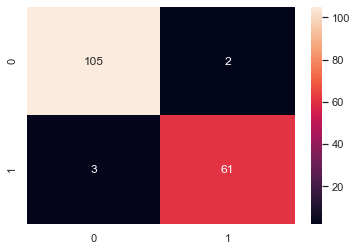

In [42]:
cm = confusion_matrix(y_2, y_test)
sns.heatmap(cm, annot= True, fmt = 'd')

<h3>Recursive Feature Elimination with Cross-Validation</h3>

In [43]:
from sklearn.feature_selection import RFECV
clf_3 = xgb.XGBClassifier()
rfecv = RFECV(estimator = clf_3, step = 1, cv=3, scoring = 'accuracy', n_jobs = -1).fit(X_train, y_train)

In [44]:
print('Optimal number of features: ', rfecv.n_features_)
print('Best Features: ', X_train.columns[rfecv.support_])

Optimal number of features:  12
Best Features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'area_se', 'smoothness_se', 'concavity_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


Accuracy score:  0.9766081871345029


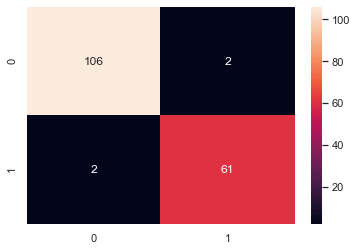

In [45]:
y_3 = rfecv.predict(X_test)
print('Accuracy score: ', accuracy_score(y_3, y_test))
cm = confusion_matrix(y_3, y_test)
sns.heatmap(cm, annot= True, fmt = 'd')

<h3>Feature Extraction using PCA</h3>

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
x_train_norm = ( x_train - x_train.mean())/(x_train.max() - x_train.min())
x_test_norm = ( x_test - x_test.mean())/(x_test.max() - x_test.min())

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Cumulative Explained Variance')

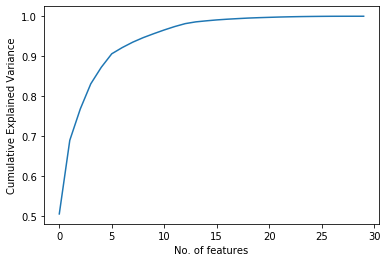

In [71]:
sns.lineplot(data = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of features')
plt.ylabel('Cumulative Explained Variance')

### k-NN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier()

In [76]:
mean_acc = np.zeros(15)
mean_acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [77]:
for i in range(1,16):
    clf1 = KNeighborsClassifier(n_neighbors = i)
    clf1.fit(X_train_2, y_train)
    y_hat = clf1.predict(X_test_2)
    mean_acc[i-1] = accuracy_score(y_test, y_hat)
mean_acc

array([0.87134503, 0.88888889, 0.9122807 , 0.90643275, 0.90643275,
       0.91812865, 0.9122807 , 0.9122807 , 0.9005848 , 0.9122807 ,
       0.90643275, 0.90643275, 0.9122807 , 0.9122807 , 0.91812865])

Text(0, 0.5, 'Accuracy')

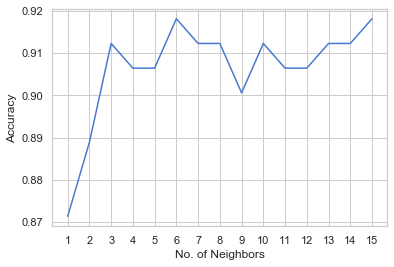

In [78]:
loc = np.arange(1,16,step=1.0)
plt.plot(range(1,16), mean_acc)
plt.xticks(loc)
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracy')

In [75]:
from sklearn.model_selection import GridSearchCV

In [79]:
grid_params = { 'n_neighbors' : [3,5,7,11,13,15],
               'metric' : ['minkowski','euclidean','manhattan'],
                'weights' : ['uniform','distance'],
                'algorithm' : ['brute','kd_tree','ball_tree']}

In [82]:
gs = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1 )

In [83]:
gs.fit(X_train_2, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    6.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['brute', 'kd_tree', 'ball_tree'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [84]:
gs.best_score_

0.8868762816131238

In [85]:
gs.best_params_

{'algorithm': 'brute',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'weights': 'distance'}

In [88]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', algorithm = 'brute', metric = 'minkowski')
knn.fit(X_train_2, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [89]:
y_1 = knn.predict(X_test_2)

In [90]:
print('K-NN accuracy: ', accuracy_score(y_test, y_1))

K-NN accuracy:  0.8888888888888888


### SVM